In [1]:
import pandas as pd
import numpy as np
import re
import string
import spacy
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
text_data= pd.read_csv("C:\\Users\\snmuj\\Downloads\\GenSim-Topic-Modeling-main\\GenSim-Topic-Modeling-main\\woman-news.csv")
print(text_data.head(2))
print(len(text_data))

   Id                                               Text
0   1  النساء والأطفال أول ضحايا الأزمة الاقتصادية في...
1   2  إقبال كبير على أول انتخابات بلدية في قطر الدوح...
13670


In [3]:
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [4]:
import nltk
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snmuj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
text_data.dropna(axis = 0, how ='any',inplace=True) 
text_data['Text'] = text_data['Text'].apply(clean_text)
text_data['Num_words_text'] = text_data['Text'].apply(lambda x:len(str(x).split())) 
print(len(text_data))
max_text_data_sentence_length  = text_data['Num_words_text'].max()
mask = (text_data['Num_words_text'] < 100) & (text_data['Num_words_text'] >=20)

13670


In [6]:
from nltk.corpus import stopwords
stop_words = stopwords.words('function-ar')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
text_data['Text']=text_data['Text'].apply(remove_stopwords)

In [7]:
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz (12.0 MB)


In [8]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [10]:
import spacy
spacy.load("en_core_web_sm")

import spacy
spacy.load("xx_ent_wiki_sm")

import xx_ent_wiki_sm
nlp = xx_ent_wiki_sm.load()

In [11]:
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ', 'VERB']):
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [12]:
text_list=text_data['Text'].tolist()
print(text_list[1])
tokenized_texts = lemmatization(text_list)
print(tokenized_texts[1])

إقبال كبير انتخابات بلدية الدوحة رويترز توجه القطريون مراكز الاقتراع لانتخاب المجلس البلدي المركزي انتخابات تاريخية تمارس المرأة لأول الانتخاب ترشيح نفسها لخوض السباق شهود عيان الناخبين توافدوا مراكز الانتخاب ابوابها وانه بحلول الساعة ظهرا المائة الانتخاب أدلوا بأصواتهم محمد المالكي
['بلدية', 'الدوحة', 'رويترز', 'القطريون', 'الاقتراع', 'لانتخاب', 'مراكز', 'بأصواتهم', 'محمد', 'المالكي']


### Create vocabulary dictionary and document term matrix

In [13]:
dictionary = corpora.Dictionary(tokenized_texts)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_texts]

In [14]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [15]:
lda_model.print_topics()

[(0,
  '0.014*"المسلمة" + 0.012*"تناول" + 0.011*"دراسة" + 0.010*"الشيخ" + 0.010*"مليون" + 0.008*"الأول" + 0.008*"السبت" + 0.007*"الشرقية" + 0.007*"فريق" + 0.007*"لحقوق"'),
 (1,
  '0.019*"الرجال" + 0.016*"اليوم" + 0.015*"معرض" + 0.012*"فعاليات" + 0.011*"مجموعة" + 0.010*"بشكل" + 0.009*"عملية" + 0.008*"المدينة" + 0.008*"سنوات" + 0.008*"طريق"'),
 (2,
  '0.012*"الجديد" + 0.011*"للمرأة" + 0.011*"نتيجة" + 0.010*"أماكن" + 0.009*"المجتمع" + 0.008*"المناصب" + 0.007*"تواجه" + 0.007*"حقوق" + 0.007*"العاملات" + 0.006*"خاصة"'),
 (3,
  '0.211*"المرأة" + 0.031*"السعودية" + 0.019*"الرجل" + 0.012*"قضايا" + 0.010*"جديدة" + 0.010*"مشاركة" + 0.010*"مجال" + 0.008*"قضية" + 0.006*"معاناة" + 0.005*"تقدم"'),
 (4,
  '0.026*"الرياض" + 0.024*"مركز" + 0.013*"بمنطقة" + 0.012*"بينما" + 0.011*"أثناء" + 0.008*"العزيز" + 0.008*"حائل" + 0.007*"سعود" + 0.007*"الشباب" + 0.006*"الأم"'),
 (5,
  '0.013*"عبدالعزيز" + 0.009*"المنطقة" + 0.009*"الأميرة" + 0.009*"منطقة" + 0.008*"كافة" + 0.007*"علاقة" + 0.006*"يبلغ" + 0.006*"باسم" 

In [16]:
# Visualize the topics
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\snmuj\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.345057  0.063288       1        1  14.807889
8      0.106840  0.324014       2        1  13.154085
4      0.038584 -0.097594       3        1  11.298600
1      0.046831 -0.042036       4        1  10.440485
9      0.039640 -0.068297       5        1   9.149097
6      0.030958 -0.027872       6        1   8.923005
5      0.049680 -0.045980       7        1   8.919506
7     -0.005537 -0.041785       8        1   8.911771
0      0.029631 -0.041755       9        1   8.482996
2      0.008430 -0.021982      10        1   5.912565, topic_info=           Term         Freq        Total Category  logprob  loglift
26       المرأة  1962.000000  1962.000000  Default  30.0000  30.0000
394      النساء  1318.000000  1318.000000  Default  29.0000  29.0000
12     السعودية   290.000000   290.000000  Default  28.0000  28.0000
25       الشرطة   210.000000   210.000000  Default  27.0000  27.0000
593      الرياض   188.000000   188.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3206   المتميزة    13.317419    14.063985  Topic10  -5.6319   2.7735
18216      شمسة    12.816433    13.562967  Topic10  -5.6702   2.7715
2613       تميز    12.796958    13.543494  Topic10  -5.6718   2.7714
223     المجتمع    33.383366    70.586838  Topic10  -4.7129   2.0793
800        خاصة    23.601804    57.369579  Topic10  -5.0596   1.9399

[395 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
218       3  0.808160    أثناء
218       5  0.186499    أثناء
2002      3  0.985556    أجريت
544       4  0.208687     أحمد
544       5  0.521718     أحمد
...     ...       ...      ...
236       8  0.986599    يتعلق
673       9  0.985157  يتناولن
408       5  0.969446    يقارب
393      10  0.983017     يقول
6286      7  0.980678   يمكنها

[421 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 5, 2, 10, 7, 6, 8, 1, 3])

In [17]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.559301238710407

Coherence Score:  0.5165054343554747


### Method to find optimal number of topics
Code from:https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#14computemodelperplexityandcoherencescore


In [18]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [19]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_texts, start=1, limit=11, step=1)

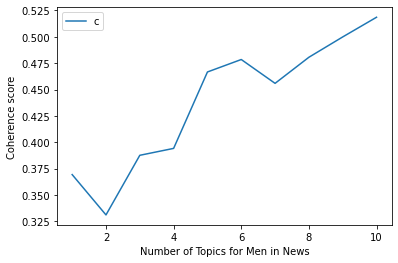

In [20]:
#Print the coherence scores
# Show graph
limit=11; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics for Men in News")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show() 

In [21]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3693
Num Topics = 2  has Coherence Value of 0.3311
Num Topics = 3  has Coherence Value of 0.3876
Num Topics = 4  has Coherence Value of 0.3942
Num Topics = 5  has Coherence Value of 0.4666
Num Topics = 6  has Coherence Value of 0.4784
Num Topics = 7  has Coherence Value of 0.4558
Num Topics = 8  has Coherence Value of 0.4806
Num Topics = 9  has Coherence Value of 0.4999
Num Topics = 10  has Coherence Value of 0.5185


In [22]:
# Select the model and print the topics
optimal_model = model_list[9]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.030*"القبض" + 0.020*"مركز" + 0.014*"الرياض" + 0.012*"امرأة" + 0.010*"بمنطقة" + 0.010*"الشرطة" + 0.008*"سنوات" + 0.008*"الأميرة" + 0.008*"واقع" + 0.008*"الشورى"'),
 (1,
  '0.198*"المرأة" + 0.013*"الرجال" + 0.011*"تناول" + 0.010*"دراسة" + 0.009*"سعود" + 0.009*"أحمد" + 0.009*"الرجل" + 0.008*"بأنها" + 0.008*"الخيرية" + 0.008*"الشعر"'),
 (2,
  '0.021*"الشرطة" + 0.019*"المرأة" + 0.017*"الرجل" + 0.014*"وجود" + 0.009*"مواقع" + 0.008*"حملة" + 0.008*"الكشف" + 0.008*"تقديم" + 0.007*"صالح" + 0.007*"النساء"'),
 (3,
  '0.019*"الأمر" + 0.016*"والنهي" + 0.015*"المنكر" + 0.012*"بالمعروف" + 0.011*"جديدة" + 0.009*"مليون" + 0.009*"رجال" + 0.008*"المشاريع" + 0.008*"سلطان" + 0.008*"زوجها"'),
 (4,
  '0.012*"رئيسة" + 0.011*"بحسب" + 0.009*"خصوصاً" + 0.009*"كافة" + 0.009*"مشاريع" + 0.009*"الاجتماعي" + 0.009*"بجامعة" + 0.008*"الماضي" + 0.008*"المرأة" + 0.007*"برنامج"'),
 (5,
  '0.206*"النساء" + 0.015*"الأمير" + 0.013*"الحادث" + 0.009*"السعوديات" + 0.008*"موقع" + 0.008*"طريق" + 0.007*"أعضاء" + 0.006*"تو

In [23]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\snmuj\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.345057  0.063288       1        1  14.806529
8      0.106840  0.324014       2        1  13.152550
4      0.038584 -0.097594       3        1  11.298592
1      0.046831 -0.042036       4        1  10.441238
9      0.039640 -0.068297       5        1   9.150590
6      0.030958 -0.027872       6        1   8.922966
5      0.049680 -0.045980       7        1   8.918165
7     -0.005537 -0.041785       8        1   8.908260
0      0.029631 -0.041755       9        1   8.486257
2      0.008430 -0.021982      10        1   5.914853, topic_info=           Term         Freq        Total Category  logprob  loglift
26       المرأة  1962.000000  1962.000000  Default  30.0000  30.0000
394      النساء  1318.000000  1318.000000  Default  29.0000  29.0000
12     السعودية   290.000000   290.000000  Default  28.0000  28.0000
25       الشرطة   210.000000   210.000000  Default  27.0000  27.0000
593      الرياض   188.000000   188.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3206   المتميزة    13.322571    14.069126  Topic10  -5.6319   2.7732
18216      شمسة    12.821392    13.567914  Topic10  -5.6702   2.7711
2613       تميز    12.801909    13.548434  Topic10  -5.6718   2.7710
223     المجتمع    33.396283    70.596394  Topic10  -4.7129   2.0792
800        خاصة    23.610936    57.376628  Topic10  -5.0596   1.9398

[395 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
218       3  0.808137    أثناء
218       5  0.186493    أثناء
2002      3  0.985556    أجريت
544       4  0.208645     أحمد
544       5  0.521613     أحمد
...     ...       ...      ...
236       8  0.986973    يتعلق
673       9  0.984794  يتناولن
408       5  0.969295    يقارب
393      10  0.982654     يقول
6286      7  0.980818   يمكنها

[421 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 5, 2, 10, 7, 6, 8, 1, 3])